### 국내 과일 시장과 소비 분석 <br>
1. 과일 1일 섭취량 분석 : 연도별 증감량, 여성/남성 소비 비율, 소득 수준별 소비 비율 <br>
   1-1. 연령층 별 과일섭취량 순위 <br>
   1-2. 소득 수준별 과일 섭취량 순위 <br>
   1-3. 성별 과일 섭취량 비교 <br> <br>

2. 과일 가격변화와 과일 섭취량의 상관 관계 분석 : https://www.kamis.or.kr/customer/mypage/my_openapi/my_openapi.do <br>
   2-1. 과일별 평균 가격 변화 시각화 <br>
   2-2. 평균 가격과 섭취량의 상관 관계 분석 <br>
   2-3. 지역별 평균 가격 변화 시각화  <br>
   2-4. 지역별 평균 가격 예측 <br> <br>

3. 과일 재배지 분포 시각화 <br>
   2-1. 과일 재배지 분포 : plotly map <br> <br>

4. 과일별 판매량
   3-1 크롤링 - 재배지에서 정재한 품목 명으로 추출하여 판매량 수 크롤링 <br> <br>
   3-2 품목별 판매량 시각화

5. 판매량에 따른 과일 성분에 따른 맛 선호도 분류 <br>
   5-1. 산도(비타민C, 구연산), 당도(당류), 수분량으로 선호도 분류 <br>
   5-2. 판매량으로 어떤 맛의 선호도가 높은지 분석 <br> <br>
   
6. 블로그 데이터 클라우드로 보는 소비자 트렌드 시각화 <br>
   6-1. 네이버 블로그 API로 자료 수집
   6-2. 데이터 클라우드 생성

# 1. 과일 1일 섭취량 분석

## ※ 패키지 설치 및 로드

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## ※ 데이터 준비
[ 과일 1일 섭취량 데이터 설명 ] <br>
자료명 : 2021 국민건강통계 <br>
파일명 : 식품섭취.xlsx <br>
시트명 : 11.과일류 <br>
과일 섭취량 : 과일류 식품의 섭취 중량에 대한 합/분석대상자 수 <br>
소득수준 : 월가구균등화소득(월가구소득/√가구원수)을 성별·연령별(5세단위) 오분위로 분류

## 1-1. 연령층 별 과일섭취량 추이와 섭취량 순위

In [165]:
# 파일 경로와 시트명 설정
file_path = '식품섭취.xlsx' # 파일경로
sheet_name = '11.과일류' # 시트명

# Excel 파일 읽기 : 연령별 데이터
age_df = pd.read_excel(file_path, 
                   sheet_name=sheet_name,
                   header=None,
                   index_col = 2,
                   skiprows=15,
                   nrows=8)

# 데이터프레임 확인
age_df

,0,1,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
2,,,,,,,,,,,,,,,,,,,,,
1-9,NaN,NaN,1459,176.9,(9.0),1506,187.1,(8.0),1199,91.8,...,(8.1),736,139.2,(9.6),535,122.3,(9.3),483,129.4,(8.8)
10-18,NaN,NaN,1440,196.9,(10.3),1370,187.5,(9.9),1205,83.9,...,(8.8),639,96.1,(7.5),469,94.8,(16.1),484,102.1,(10.5)
19-29,NaN,NaN,1550,220.0,(11.3),1370,203.7,(11.6),1045,90.3,...,(7.0),669,86.8,(8.2),624,66.7,(7.1),584,64.3,(5.8)
30-39,NaN,NaN,1866,228.8,(9.8),1805,227.0,(10.4),1466,110.8,...,(11.5),855,110.1,(8.3),633,104.4,(8.5),549,83.1,(8.0)
40-49,NaN,NaN,1461,202.9,(8.5),1601,222.4,(12.4),1559,88.7,...,(7.4),1036,165.2,(18.1),807,143.3,(9.4),810,128.1,(9.1)
50-59,NaN,NaN,1104,189.7,(11.2),979,235.4,(12.6),1015,83.7,...,(9.9),1061,201.6,(10.3),861,169.6,(11.4),909,180.2,(10.1)
60-69,NaN,NaN,942,158.6,(11.6),788,210.2,(14.1),847,63.3,...,(10.6),1043,188.6,(9.2),892,177.5,(10.3),981,177.3,(10.4)
70+,NaN,NaN,578,115.1,(11.7),549,150.1,(11.5),594,41.4,...,(10.6),1108,147.6,(7.9),987,156.7,(8.4),1140,142.1,(8.9)


In [166]:
# 2017~2021(5년) 연령별 섭취 데이터만 수집
df=age_df.drop([0,1], axis=1)
df = df.iloc[:,39::3]
df

,42,45,48,51,54
2,,,,,
1-9,812,756,736,535,483
10-18,634,605,639,469,484
19-29,653,682,669,624,584
30-39,845,862,855,633,549
40-49,1028,1050,1036,807,810
50-59,1116,1055,1061,861,909
60-69,1036,997,1043,892,981
70+,1043,1057,1108,987,1140


In [167]:
df.columns=['2017','2018','2019','2020','2021'] # 컬럼명 변경
df.index=['10대 미만','10대','20대','30대','40대','50대','60대','70대 이상'] # 인덱스명 변경
df

,2017,2018,2019,2020,2021
10대 미만,812,756,736,535,483
10대,634,605,639,469,484
20대,653,682,669,624,584
30대,845,862,855,633,549
40대,1028,1050,1036,807,810
50대,1116,1055,1061,861,909
60대,1036,997,1043,892,981
70대 이상,1043,1057,1108,987,1140


### [ 5년 간 연령별 과일 섭취량 추이 ]

[Text(0.5, 0, '년도'),
 Text(0, 0.5, '섭취량'),
 Text(0.5, 1.0, '연도에 따른 연령별 과일섭취량 추이')]

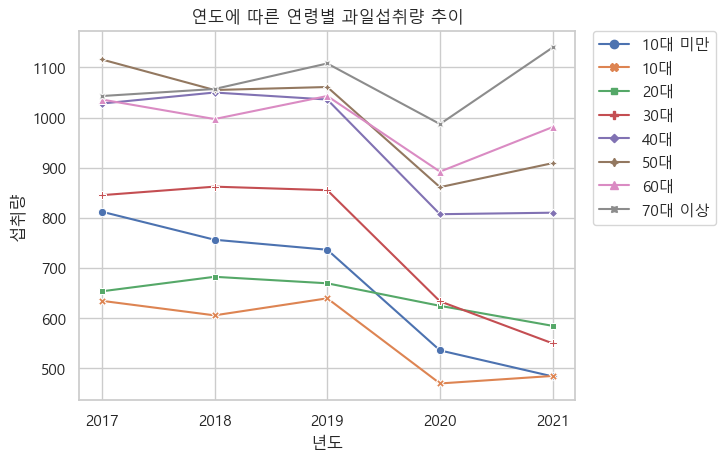

In [168]:
df_copy = df.T # x축 y축 치환

# 그래프 그리기
sns.set(style='whitegrid', font ='Malgun Gothic', font_scale=1)
ax = sns.lineplot(data=df_copy, markers=True, dashes=False)
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.02))  # 범례 위치 조정
ax.set(xlabel='년도', ylabel='섭취량',title='연도에 따른 연령별 과일섭취량 추이')

결과: <b>2020년도에 전 연령대에서 과일 섭취량이 대폭 하락세</b>를 보였고, <br>
<b>40대 이상의 연령층</b>에서는 <b>2021년 과일 섭취량이 다시 증가</b>하기 시작했지만, 
<b>30대 이하의 연령층</b>에서는 <b>소폭 상승하거나 꾸준히 하락세</b>를 보이고 있다.

### [ 과일 섭취량이 많은 연령대 순위 ]

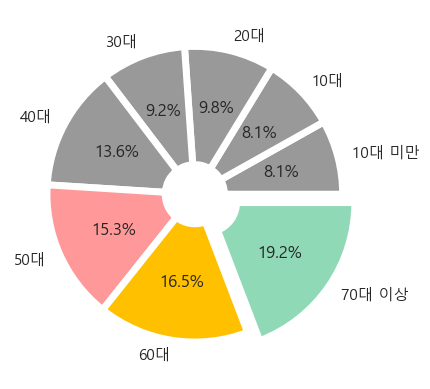

In [169]:
explode = [0, 0, 0, 0, 0, 0, 0, 0.10]
colors = ['#999', '#999', '#999', '#999', '#999', '#ff9999', '#ffc000', '#8fd9b6']
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df_copy.loc['2021'], labels=df_copy.columns, explode=explode,autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

<b>결과: 70대 이상이 19.2%로 1위, 60대가 16.5%로 2위, 50대가 15.3%로 3위</b> <br>
대체로 연령대가 높을수록 과일 섭취량이 많은 것으로 나타났다.

### [ 과일 섭취량이 적은 연령대 순위 ]

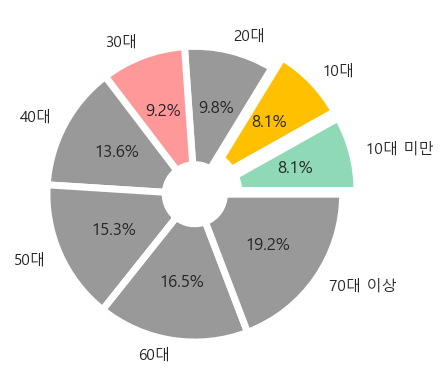

In [170]:
explode = [0.10, 0.10, 0, 0, 0, 0, 0, 0,]
colors = ['#8fd9b6', '#ffc000', '#999','#ff9999', '#999', '#999', '#999', '#999']
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df_copy.loc['2021'], labels=df_copy.columns, explode=explode,autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

<b>결과: 19대 미만이 8.1%로 1위, 10대가 8.1%로 2위, 30대가 9.2%로 3위</b>

## 1-2. 소득 수준별 과일섭취량 추이와 섭취량 순위

In [171]:
# Excel 파일 읽기 : 소득수준별 데이터
income_df = pd.read_excel(file_path, 
                   sheet_name=sheet_name,
                   header=None,
                   index_col = 2,
                   skiprows=49,
                   nrows=5)

# 데이터프레임 확인
income_df

,0,1,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
2,,,,,,,,,,,,,,,,,,,,,
하,NaN,NaN,2037,145.9,(8.6),1689,174.6,(9.7),1870,59.4,...,(6.3),1422,112.6,(6.3),1165,98.6,(9.1),1182,104.5,(8.4)
중하,NaN,NaN,2009,179.1,(7.7),1896,196.5,(10.4),1790,77.8,...,(5.8),1403,127.0,(6.9),1161,116.2,(7.9),1200,97.0,(5.9)
중,NaN,NaN,2172,197.5,(8.3),1898,220.3,(11.5),1732,91.2,...,(7.7),1454,123.2,(6.7),1166,127.6,(9.5),1206,120.3,(6.8)
중상,NaN,NaN,2114,212.6,(10.1),1778,213.6,(11.3),1736,98.2,...,(8.1),1436,152.7,(14.8),1116,124.9,(8.7),1161,119.8,(8.8)
상,NaN,NaN,2068,236.5,(10.4),2130,234.1,(10.7),1715,116.7,...,(7.4),1405,160.1,(8.8),1182,135.8,(10.0),1163,138.7,(7.8)


In [172]:
# 2017~2021(5년) 소득수준별 섭취 데이터만 수집
df2=income_df.drop([0,1], axis=1)
df2 = df2.iloc[:,39::3]
df2

,42,45,48,51,54
2,,,,,
하,1435,1411,1422,1165,1182
중하,1453,1415,1403,1161,1200
중,1437,1401,1454,1166,1206
중상,1453,1413,1436,1116,1161
상,1375,1411,1405,1182,1163


In [173]:
df2.index = ['하','중하','중','중상','상'] # 인덱스명 변경(공백제거)
df2.columns=['2017','2018','2019','2020','2021'] # 컬럼명 변경
df2

,2017,2018,2019,2020,2021
하,1435,1411,1422,1165,1182
중하,1453,1415,1403,1161,1200
중,1437,1401,1454,1166,1206
중상,1453,1413,1436,1116,1161
상,1375,1411,1405,1182,1163


### [ 5년 간 소득수준별 과일 섭취량 추이 ]

[Text(0.5, 0, '년도'),
 Text(0, 0.5, '섭취량'),
 Text(0.5, 1.0, '연도에 따른 소득수준별 과일섭취량 추이')]

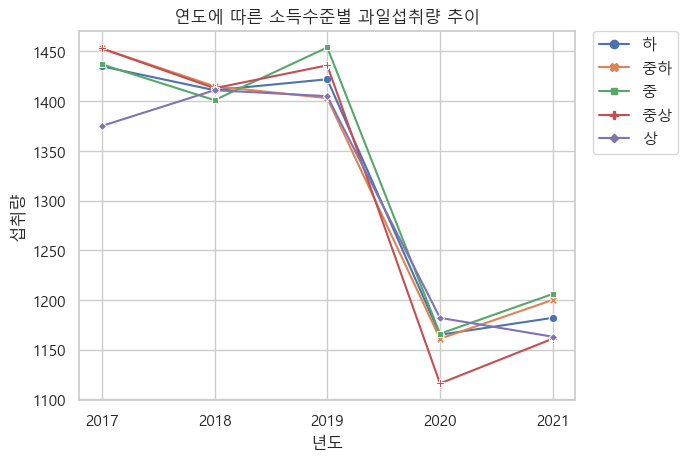

In [174]:
df2_copy = df2.T # x축 y축 치환

# 그래프 그리기
sns.set(style='whitegrid', font ='Malgun Gothic', font_scale=1)
ax = sns.lineplot(data=df2_copy, markers=True, dashes=False)
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.02))  # 범례 위치 조정
ax.set(xlabel='년도', ylabel='섭취량',title='연도에 따른 소득수준별 과일섭취량 추이')

결과: <b>2020년도에 전 소득계층에서 과일 섭취량이 대폭 하락세</b>를 보였고, <b>2020년도에 소폭 상승세</b>를 보였다.

### [ 과일 섭취량이 많은 소득계층 순위 ]

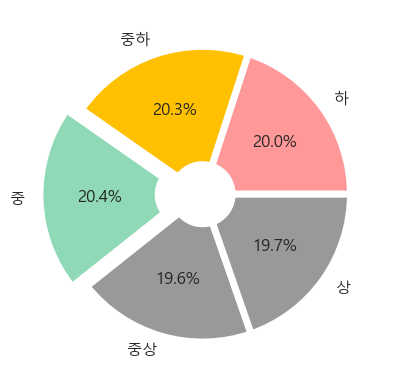

In [175]:
explode = [0, 0, 0.10, 0, 0]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#999', '#999']
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df2_copy.loc['2021'], labels=df2_copy.columns, explode=explode,autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

<b>결과: 중위계층이 20.4%로 1위, 중하위계층이 20.3%로 2위, 하위계층이 20.0%로 3위</b>

## 1-3. 성별 과일 섭취량 비교

In [180]:
# Excel 파일 읽기 : 남성 데이터
male_df = pd.read_excel(file_path, 
                   sheet_name=sheet_name,
                   header=None,
                   index_col = 2,
                   skiprows=62,
                   nrows=8)

# 데이터프레임 확인
male_df.head()

,0,1,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
2,,,,,,,,,,,,,,,,,,,,,
1-9,NaN,NaN,766,166.2,(10.6),811,199.3,(9.5),615,90.3,...,(10.2),373,145.0,(11.6),273,133.6,(11.2),240,132.5,(13.0)
10-18,NaN,NaN,738,199.0,(13.7),696,180.1,(11.4),634,76.8,...,(11.6),334,84.4,(9.9),255,100.1,(26.7)*,259,98.2,(13.4)
19-29,NaN,NaN,707,188.3,(13.5),615,155.2,(12.2),451,73.2,...,(11.0),323,92.1,(13.6),292,63.1,(9.0),279,60.7,(8.9)
30-39,NaN,NaN,922,197.0,(12.1),857,182.4,(11.8),659,99.0,...,(11.9),384,91.5,(11.6),270,93.7,(12.5),232,71.8,(10.7)
40-49,NaN,NaN,720,161.6,(10.6),784,167.9,(15.1),731,73.3,...,(10.6),441,139.6,(10.0),348,123.6,(10.7),351,124.2,(15.0)


In [181]:
# Excel 파일 읽기 : 여성 데이터
female_df = pd.read_excel(file_path, 
                   sheet_name=sheet_name,
                   header=None,
                   index_col = 2,
                   skiprows=109,
                   nrows=8)

# 데이터프레임 확인
female_df.head()

,0,1,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
2,,,,,,,,,,,,,,,,,,,,,
1-9,NaN,NaN,693,188.9,(12.7),695,172.9,(10.0),584,93.5,...,(10.0),363,133.2,(11.1),262,110.5,(12.7),243,126.1,(11.2)
10-18,NaN,NaN,702,194.7,(12.5),674,195.2,(13.3),571,92.0,...,(12.5),305,109.0,(10.3),214,88.5,(10.2),225,106.4,(14.6)
19-29,NaN,NaN,843,246.6,(13.8),755,243.7,(15.4),594,108.3,...,(7.6),346,80.8,(7.7),332,70.6,(9.7),305,68.2,(7.9)
30-39,NaN,NaN,944,260.2,(12.5),948,266.7,(13.0),807,123.3,...,(16.8),471,130.4,(9.4),363,116.2,(10.8),317,95.5,(10.1)
40-49,NaN,NaN,741,245.8,(11.7),817,273.0,(14.8),828,104.7,...,(9.1),595,191.9,(34.6),459,163.8,(13.4),459,132.2,(9.8)


In [184]:
# 2012~2021 남성 섭취 데이터만 수집
male_data=male_df.drop([0,1], axis=1)
male_data=male_data.iloc[:,24::3]

# 2021 남성 섭취 데이터만 수집
male_data = male_data.iloc[:,9]
male_data

2
 1-9      240
 10-18    259
 19-29    279
 30-39    232
 40-49    351
 50-59    370
 60-69    414
 70+      494
Name: 54, dtype: int64

In [185]:
# 2012~2021 여성 섭취 데이터만 수집
female_data=female_df.drop([0,1], axis=1)
female_data=female_data.iloc[:,24::3]

# 2021 여성 섭취 데이터만 수집
female_data = female_data.iloc[:,9]
female_data

2
 1-9      243
 10-18    225
 19-29    305
 30-39    317
 40-49    459
 50-59    539
 60-69    567
 70+      646
Name: 54, dtype: int64

In [187]:
total = {'여성':female_data, '남성':male_data}
total_data = pd.DataFrame(total)
total_data

,여성,남성
2,,
1-9,243,240
10-18,225,259
19-29,305,279
30-39,317,232
40-49,459,351
50-59,539,370
60-69,567,414
70+,646,494


In [191]:
total_data.index=['10대 미만','10대','20대','30대','40대','50대','60대','70대 이상'] # 인덱스명 변경

In [192]:
total_data_copy = total_data.T # x축 y축 치환

### [ 성별 과일 섭취량 비교 ]

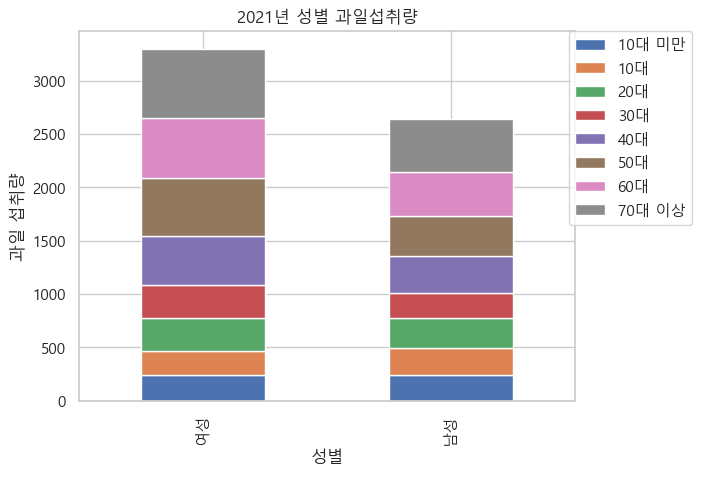

In [193]:
total_data_copy.plot(kind='bar', stacked=True)
plt.title('2021년 성별 과일섭취량')
plt.xlabel('성별')
plt.ylabel('과일 섭취량')

# 범례 위치와 레이아웃 조정
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.02))

plt.show()

<b>결과: 여성의 과일 섭취량이 남성의 과일 섭취량 보다 많다</b>

## ※ 데이터 준비
[ 과일 가격 정보 ] <br>
자료명 : 연도별 도.소매가격정보 OPEN-API 

## ※ 패키지 설치 및 로드

In [75]:
import requests
import xml.etree.ElementTree as ET
import pprint
import numpy as np

## 2. 과일 가격변화와 과일 섭취량의 상관 관계 분석

In [89]:
# 부류코드
code_category = 40  # 400: 과일류

# 품종별 등급코드
code_product = {
    411: ['01', '05', '06', '07'],
    412: ['01', '02', '03', '04'],
    413: ['01', '04', '05'],
    414: ['01', '02', '03', '06', '07', '08', '09', '10', '11', '12'],
    415: ['00', '01', '02']
}
# 411: 사과, 412: 배, 413: 복숭아, 414: 포도, 415: 감귤

# API 요청 보내기
base_url = 'http://www.kamis.or.kr/service/price/xml.do?action=yearlySalesList'
p_cert_key = 'a667632f-857f-40c5-805c-6ee126d7a1f4'
p_cert_id = 3772
p_yyyy = 2017
p_period = 5
p_countycode = 1101
p_convert_kg_yn = 'N'

dfset = pd.DataFrame()  # 빈 데이터프레임

for item_code, kind_codes in code_product.items():
    for kind_code in kind_codes: # 품종별 등급코드 순회
        for rank_code in range(1, 6): # 품종 순회
            try:
                # 요청
                response = requests.get(
                    f'{base_url}&p_yyyy={p_yyyy}&p_period={p_period}&p_itemcategorycode={code_category}&p_itemcode={item_code}&p_kindcode={kind_code}&p_graderank={rank_code}&p_countycode={p_countycode}&p_convert_kg_yn={p_convert_kg_yn}&p_cert_key={p_cert_key}&p_cert_id={p_cert_id}&p_returntype=xml'
                )
                # 응답 처리
                if response.status_code == 200:                
                    # XML 파싱
                    root = ET.fromstring(response.content)

                    # 데이터 추출
                    data_list = []
                    for price_elem in root.findall('price'):
                        try:
                            productclscode = price_elem.find('productclscode').text
                        except AttributeError:
                            continue  # productclscode가 없는 경우 스킵

                        caption = price_elem.find('caption').text
                        for item_elem in price_elem.findall('item'):
                            temp_dict = {'caption': caption}
                            for child in item_elem:
                                temp_dict[child.tag] = child.text
                            data_list.append(temp_dict)

                    # 판다스 데이터프레임으로 변환
                    df = pd.DataFrame(data_list)
                    if dfset.empty:
                        print(df)
                        # 첫 데이터
                        dfset = df 
                    else:
                        # 첫 데이터 이후부터는 이어붙임
                        if df.empty:
                            continue  # 빈 데이터일때 스킵            
                        print(df)                
                        dfset = pd.concat([dfset, df], axis=0, join='outer', ignore_index=True)
                else:
                    print('Error occurred:', response.status_code)

            except requests.exceptions.RequestException as e:
                print('Request failed:', e)
            except Exception as e:
                print('An error occurred:', e)

                                  caption div avg_data max_data min_data  \
0  중도매인 판매가격 > null > 사과 > 홍옥 > 상품 > 10kg  평년        -        -        -   
1        소매가격 > null > 사과 > 홍옥 > 상품 > 10개  평년        -        -        -   

  stddev_data cv_data af_data  
0           -       -       -  
1           -       -       -  
                                  caption div avg_data max_data min_data  \
0  중도매인 판매가격 > null > 사과 > 홍옥 > 중품 > 10kg  평년        -        -        -   

  stddev_data cv_data af_data  
0           -       -       -  
                                   caption   div avg_data max_data min_data  \
0   중도매인 판매가격 > null > 사과 > 후지 > 상품 > 10kg  2012   61,302   80,000   46,667   
1   중도매인 판매가격 > null > 사과 > 후지 > 상품 > 10kg  2013   47,146   53,333   40,000   
2   중도매인 판매가격 > null > 사과 > 후지 > 상품 > 10kg  2014   55,595   73,333   33,333   
3   중도매인 판매가격 > null > 사과 > 후지 > 상품 > 10kg  2015   40,615   46,667   33,000   
4   중도매인 판매가격 > null > 사과 > 후지 > 상품 > 10kg  2016   42,589   46,

                                  caption   div avg_data max_data min_data  \
0   중도매인 판매가격 > null > 배 > 신고 > 상품 > 15kg  2012   56,635   70,000   40,000   
1   중도매인 판매가격 > null > 배 > 신고 > 상품 > 15kg  2013   54,702   75,000   27,000   
2   중도매인 판매가격 > null > 배 > 신고 > 상품 > 15kg  2014   49,827   80,000   25,000   
3   중도매인 판매가격 > null > 배 > 신고 > 상품 > 15kg  2015   41,407   50,000   30,000   
4   중도매인 판매가격 > null > 배 > 신고 > 상품 > 15kg  2016   48,902   60,000   40,000   
5   중도매인 판매가격 > null > 배 > 신고 > 상품 > 15kg  2017   48,244   63,000   35,000   
6   중도매인 판매가격 > null > 배 > 신고 > 상품 > 15kg    평년   51,144   80,000   25,000   
7         소매가격 > null > 배 > 신고 > 상품 > 10개  2012   34,040   42,083   28,280   
8         소매가격 > null > 배 > 신고 > 상품 > 10개  2013   35,120   43,498   28,998   
9         소매가격 > null > 배 > 신고 > 상품 > 10개  2014   33,520   41,822   23,165   
10        소매가격 > null > 배 > 신고 > 상품 > 10개  2015   29,480   33,513   24,738   
11        소매가격 > null > 배 > 신고 > 상품 > 10개  2016   31,487   34,98

                                    caption div avg_data max_data min_data  \
0  중도매인 판매가격 > null > 복숭아 > 창방조생 > 상품 > 4kg  평년        -        -        -   
1       소매가격 > null > 복숭아 > 창방조생 > 상품 > 10개  평년        -        -        -   

  stddev_data cv_data af_data  
0           -       -       -  
1           -       -       -  
                                    caption div avg_data max_data min_data  \
0  중도매인 판매가격 > null > 복숭아 > 창방조생 > 중품 > 4kg  평년        -        -        -   

  stddev_data cv_data af_data  
0           -       -       -  
                                  caption   div avg_data max_data min_data  \
0  중도매인 판매가격 > null > 복숭아 > 유명 > 상품 > 4kg  2012   16,253   17,600   14,400   
1  중도매인 판매가격 > null > 복숭아 > 유명 > 상품 > 4kg  2013   22,540   26,667   14,222   
2  중도매인 판매가격 > null > 복숭아 > 유명 > 상품 > 4kg  2014   12,000   16,000   11,556   
3  중도매인 판매가격 > null > 복숭아 > 유명 > 상품 > 4kg    평년        -   26,667   11,556   
4       소매가격 > null > 복숭아 > 유명 > 상품 > 10개  2012   12,500  

                                   caption div avg_data max_data min_data  \
0  중도매인 판매가격 > null > 포도 > 델라웨어 > L과 > 6kg  평년        -        -        -   
1       소매가격 > null > 포도 > 델라웨어 > L과 > 1kg  평년        -        -        -   

  stddev_data cv_data af_data  
0           -       -       -  
1           -       -       -  
                                   caption div avg_data max_data min_data  \
0  중도매인 판매가격 > null > 포도 > 델라웨어 > M과 > 6kg  평년        -        -        -   
1       소매가격 > null > 포도 > 델라웨어 > M과 > 1kg  평년        -        -        -   

  stddev_data cv_data af_data  
0           -       -       -  
1           -       -       -  
                                   caption   div avg_data max_data min_data  \
0   중도매인 판매가격 > null > 포도 > MBA > L과 > 5kg  2012   15,935   28,000   10,000   
1   중도매인 판매가격 > null > 포도 > MBA > L과 > 5kg  2013   17,233   20,000   12,000   
2   중도매인 판매가격 > null > 포도 > MBA > L과 > 5kg  2014   11,886   16,000    8,000   
3   중도매인 판매가격 > null > 포도 > 

                                           caption div avg_data max_data  \
0  중도매인 판매가격 > null > 포도 > 톰슨 호주(~23.5) > L과 > 8kg  평년        -        -   
1       소매가격 > null > 포도 > 톰슨 호주(~23.5) > L과 > 1kg  평년        -        -   

  min_data stddev_data cv_data af_data  
0        -           -       -       -  
1        -           -       -       -  
                                           caption div avg_data max_data  \
0  중도매인 판매가격 > null > 포도 > 톰슨 호주(~23.5) > M과 > 8kg  평년        -        -   
1       소매가격 > null > 포도 > 톰슨 호주(~23.5) > M과 > 1kg  평년        -        -   

  min_data stddev_data cv_data af_data  
0        -           -       -       -  
1        -           -       -       -  
                                    caption div avg_data max_data min_data  \
0  중도매인 판매가격 > null > 포도 > 샤인머스켓 > L과 > 2kg  평년        -        -        -   
1       소매가격 > null > 포도 > 샤인머스켓 > L과 > 2kg  평년        -        -        -   

  stddev_data cv_data af_data  
0           -       -       -

In [90]:
dfset.shape

(360, 8)

In [91]:
# 처음 5개 데이터
dfset.head()

,caption,div,avg_data,max_data,min_data,stddev_data,cv_data,af_data
0,중도매인 판매가격 > null > 사과 > 홍옥 > 상품 > 10kg,평년,-,-,-,-,-,-
1,소매가격 > null > 사과 > 홍옥 > 상품 > 10개,평년,-,-,-,-,-,-
2,중도매인 판매가격 > null > 사과 > 홍옥 > 중품 > 10kg,평년,-,-,-,-,-,-
3,중도매인 판매가격 > null > 사과 > 후지 > 상품 > 10kg,2012,"61,302","80,000","46,667","11,737",19.15,0.71
4,중도매인 판매가격 > null > 사과 > 후지 > 상품 > 10kg,2013,"47,146","53,333","40,000","3,660",7.76,0.33


In [96]:
# 누락데이터 '-'를 NaN으로 치환
dfset = dfset.replace('-', np.nan)

In [97]:
# 누락데이터 확인
dfset.isnull().sum()

caption         0
div             0
avg_data       49
max_data       45
min_data       45
stddev_data    45
cv_data        49
af_data        45
dtype: int64

In [98]:
# 평균 가격의 누락 데이터 제거
filter_df = dfset.dropna(subset=['avg_data'])
filter_df.shape

(311, 8)

In [99]:
# 누락데이터 확인
filter_df.isnull().sum()

caption        0
div            0
avg_data       0
max_data       0
min_data       0
stddev_data    0
cv_data        0
af_data        0
dtype: int64